In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Central Tendency
**Central tendency is a statistical concept that refers to the center or typical value of a dataset. It gives you an idea of where most of the data points lie or what a "typical" data point might look like. The three main measures of central tendency are: `Mean, Median, Mode`**

Before we start studying **Central Tendency**, let's assess the data we will study.
  * The dataset was generated using NumPy random module to demonstrate the following distributions: **`Normal, Exponential, Poisson, and Uniform`**
  * There is a column called Positive Skewed and Negative Skewed. Skewness is a measure of symmetry. A distribution is symmetric when it looks the same to the left and right of the centre point when it is mirrored. We will study this measure in more detail; however, for now, we just want to cover the concept
  * We are rounding the numbers with `.round()`. We'll include values up to 3 decimal points

In [27]:
from scipy.stats import skewnorm

np.random.seed(seed=1)
size=1000

# loc = mean, scale = standard deviation and size = number of values
X1 = np.random.normal(loc=40, scale=2, size=int(size/2) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/2) ) 
bi_modal = np.concatenate([X1, X2]) # Merging X1 & X2

X1 = np.random.normal(loc=40, scale=4, size=int(size/4) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/4) ) 
X3 = np.random.normal(loc=0, scale=2, size=int(size/4) ) 
X4 = np.random.normal(loc=80, scale=2, size=int(size/4) ) 
multi_modal = np.concatenate([X1, X2, X3, X4])


df = pd.DataFrame(data={'Normal':np.random.normal(loc=0, scale=2, size=size),
                        "Positive Skewed": skewnorm.rvs(a=10, size=size),
                        "Negative Skewed": skewnorm.rvs(a=-10, size=size),
                        "Exponential":np.random.exponential(scale=20,size=size),
                        "Uniform":np.random.uniform(low=0.0, high=1.0, size=size),
                        "Bimodal":  bi_modal,
                        "Multimodal":  multi_modal,
                        "Poisson":np.random.poisson(lam=1.0, size=size),
                        "Discrete": np.random.choice([10,12,14,15,16,17,20],size=size),
                        }).round(3)

df.head(3)

,Normal,Positive Skewed,Negative Skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,0.979,0.091,-0.636,14.184,0.609,43.249,39.387,0,16
1,0.478,0.221,-1.041,46.976,0.886,38.776,30.270,1,17
2,-0.896,1.012,-1.096,3.593,0.582,38.944,42.032,4,10


Let's plot the distribution for each column
* We will loop over each DataFrame column, create a figure and plot a histogram using `sns.histplot()`
* Pay attention to the shapes and in which range in the x-axis is most frequent, in other words, where there is a higher "count" in the y-axis. 

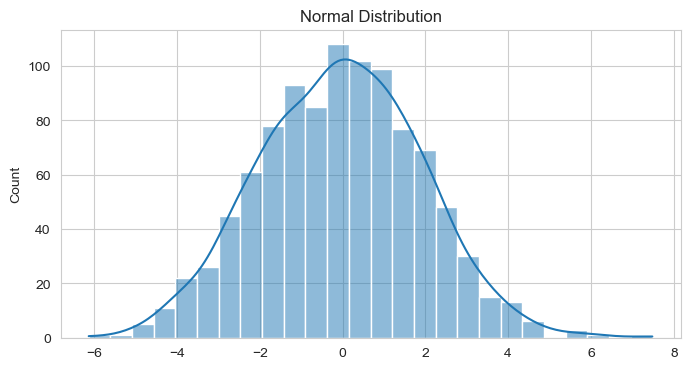

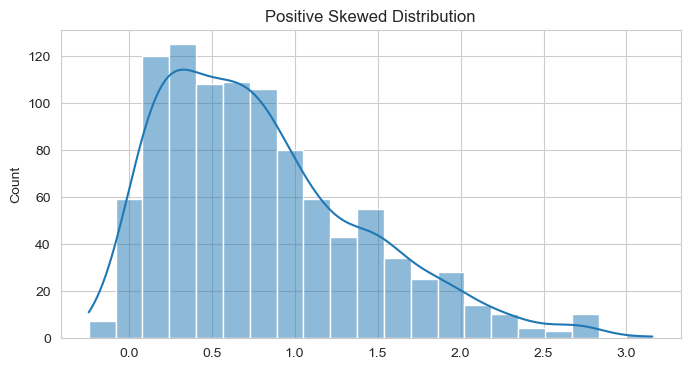

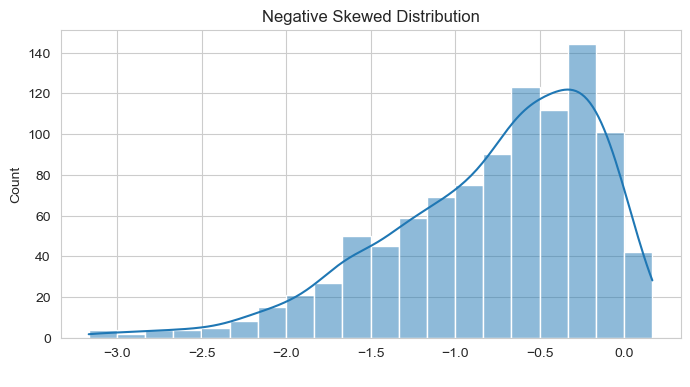

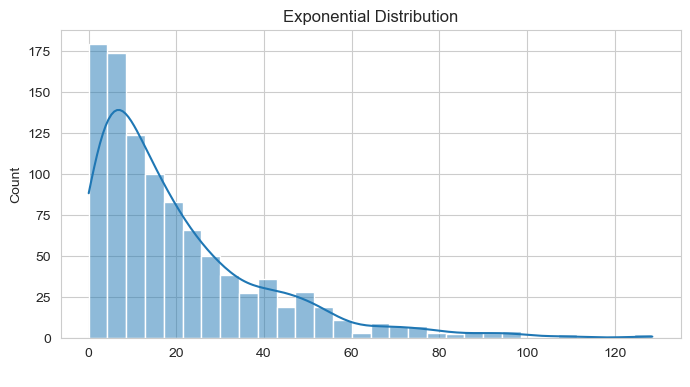

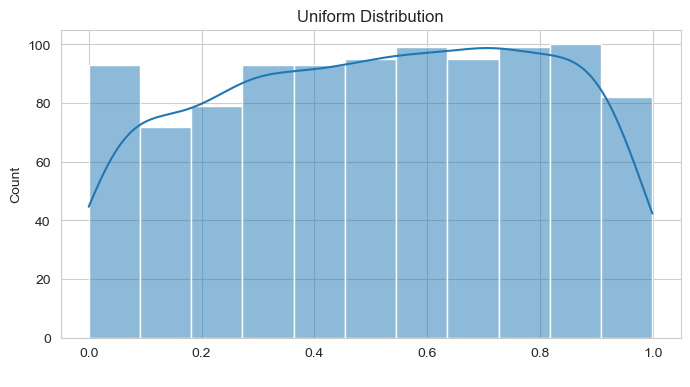

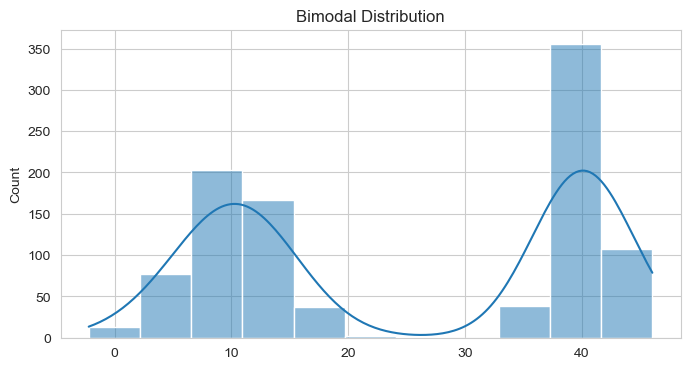

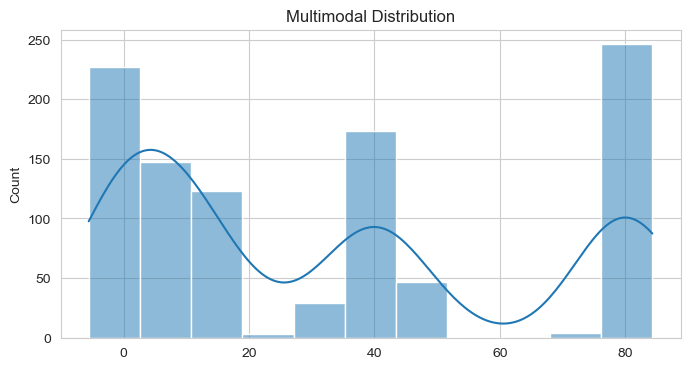

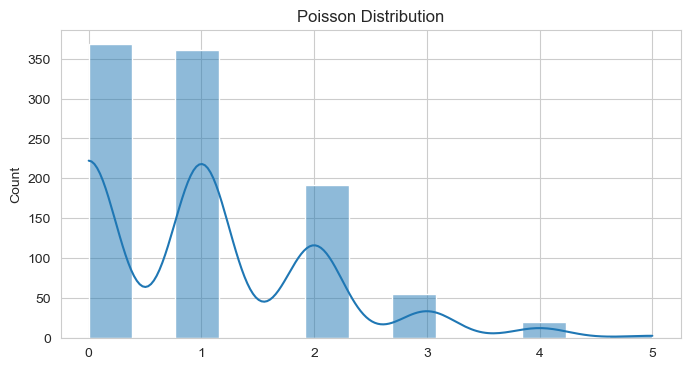

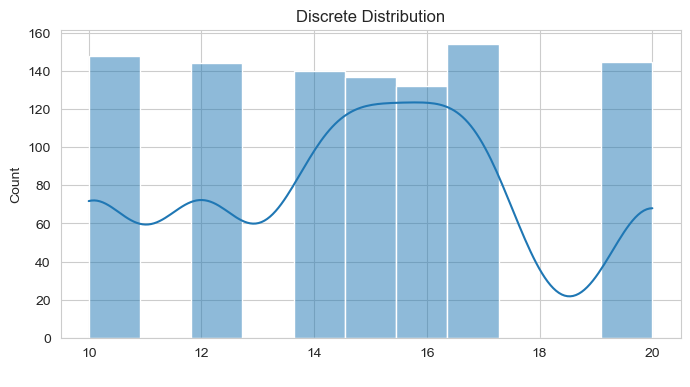

In [30]:
for col in df.columns:
  plt.figure(figsize=(8,4))
  sns.histplot(data=df, x=col, kde=True)
  plt.title(f"{col} Distribution")
  plt.xlabel(" ")
  plt.show();
  print("\n\n")

## Central tendency helps provide **figures to summarise** the data. We will start with:
* Mean
* Median 
* Mode

### Mean

Mean, commonly referred to as average, is defined as the **measure of the spread of the data around that sample**.
*  It is the sum of all elements divided by the total number of observations.

To calculate the DataFrame mean, just use the method `.mean()` to see mean levels for each numerical variable. The documentation link is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

In [35]:
df.mean()

Normal             -0.044322
Positive Skewed     0.801536
Negative Skewed    -0.776990
Exponential        20.056794
Uniform             0.511605
Bimodal            25.101810
Multimodal         32.632432
Poisson             1.010000
Discrete           14.853000
dtype: float64

Let's consider the normal distribution from DataFrame `df` and plot it

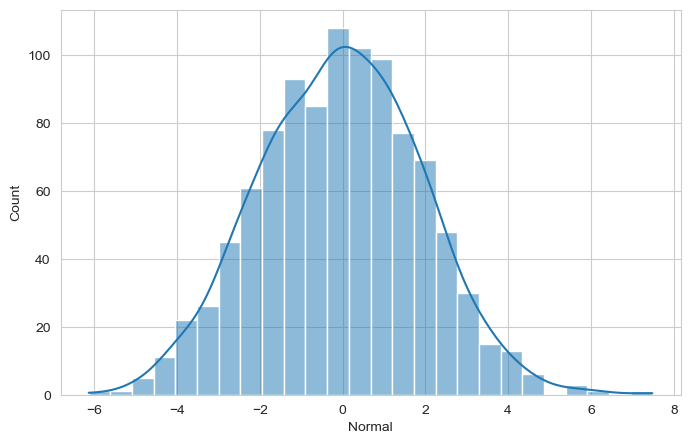

In [38]:
col = 'Normal'

plt.figure(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)
plt.show()

Let's now add the mean level to the histogram to understand better where the mean lies.
* A quick note on `plt.text()`: we programmatically set the text position. We use `x` as the mean plus an offset, so the text is not on the top of the line. The offset we used is a fraction of the value from the standard deviation. It could be any other figure/metric, but the trick finds a slight offset to the text. We will explain later the concept and applications of standard deviation. For 'y', we gathered the y-axis range with `.get_ylim()` and used the upper value with [1], so we could access the "ceiling" of the graph. Then, to increase readability, we shifted this value a bit by multiplying by 0.9 - this number is arbitrary. It's just for readability purposes.

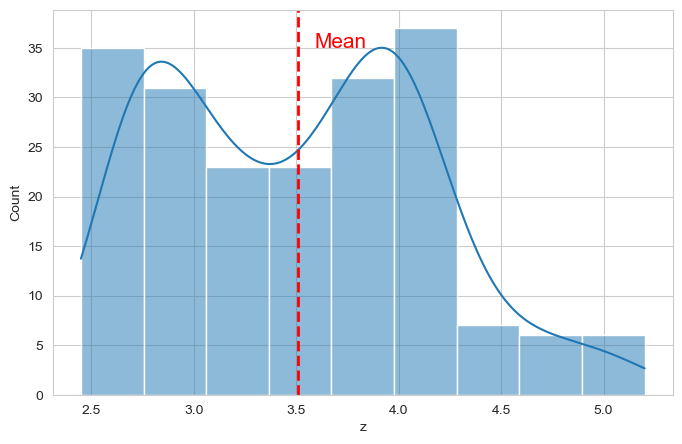

In [91]:
fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)

# Create a red dashed vertical line at the mean value
plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)

# Label this red dashed line with 'Mean' offset to the right of the line
plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

# x=df[col].mean() + df[col].std()/8 - X-coordinate: a bit to the right of the mean
# y=axes.get_ylim()[1] * 0.90 - Y-coordinate: 90% up the Y-axis
# s='Mean' - Text to display
# fontsize=15 - Font size of the text
# c='r' - Text color (red)

plt.show()

You already saw the distribution shape for all variables. Next, we will scan over the variables and will plot their distribution. 

**Before plotting, can you predict where the mean level will be? Go back to the previous graphs with all histograms and guess where the mean level will be positioned**
* ONLY after doing that, run the cell below

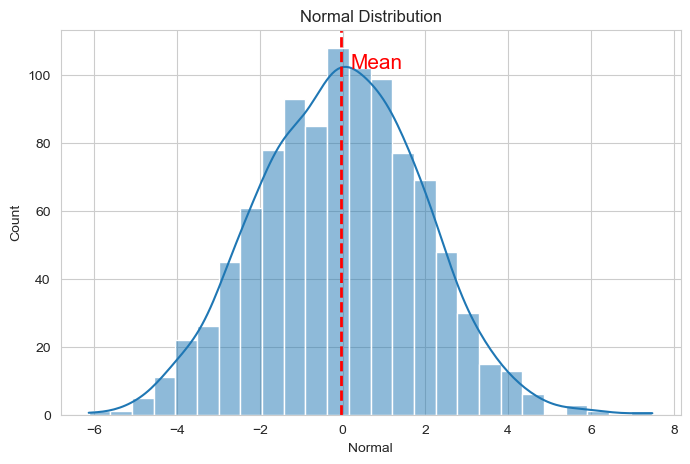

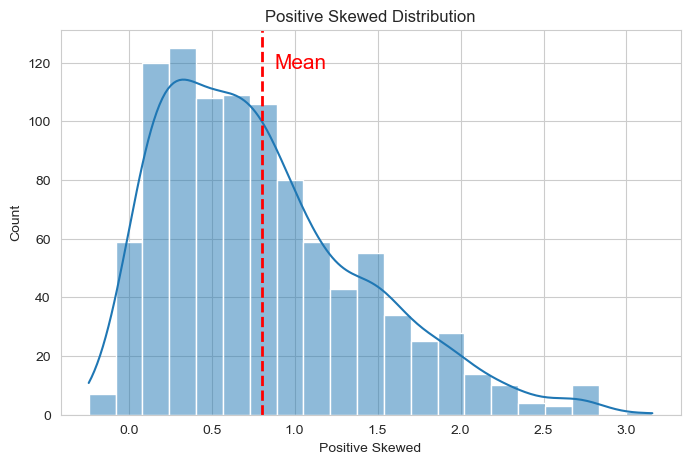

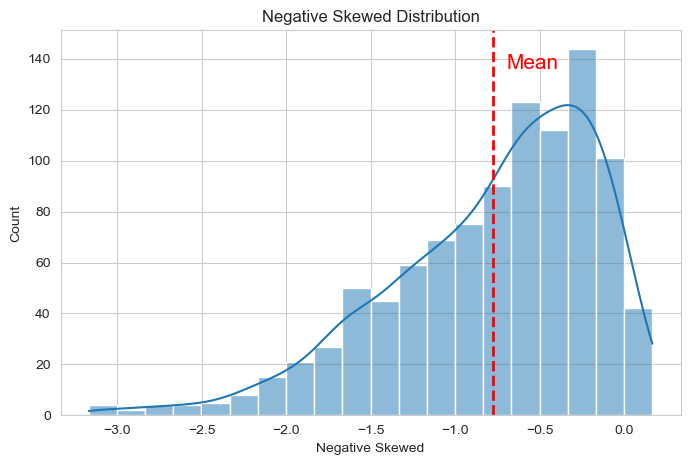

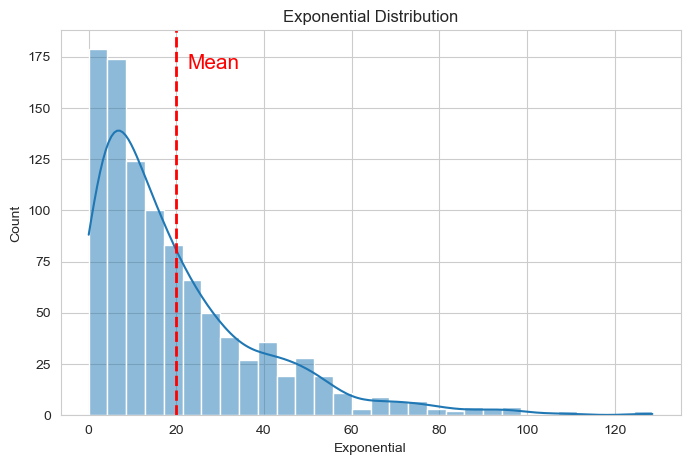

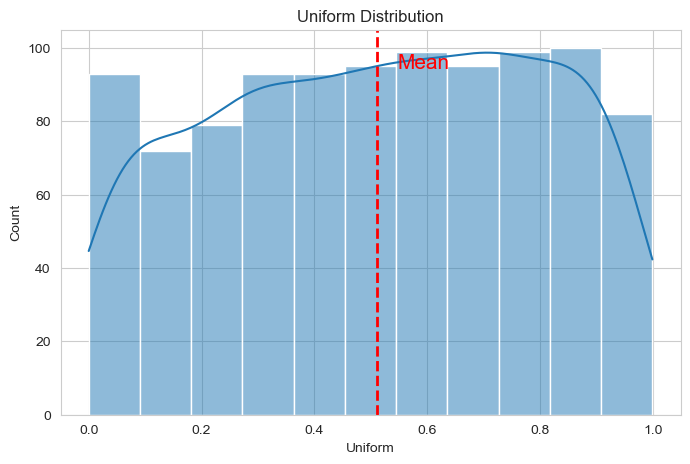

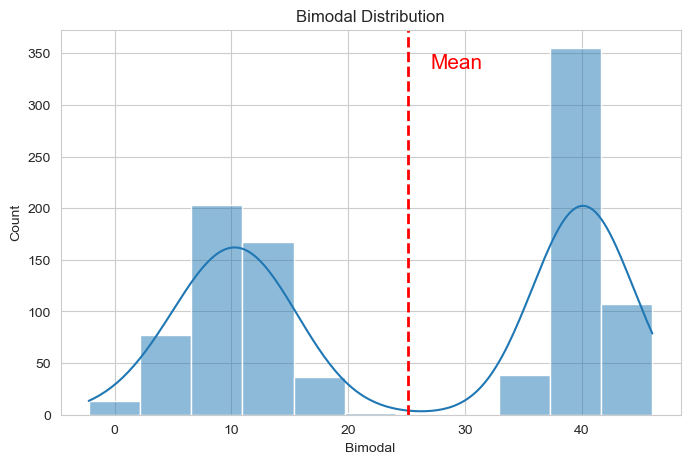

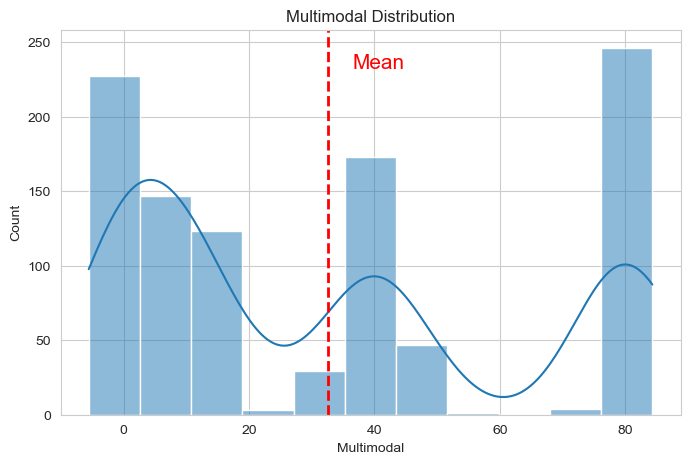

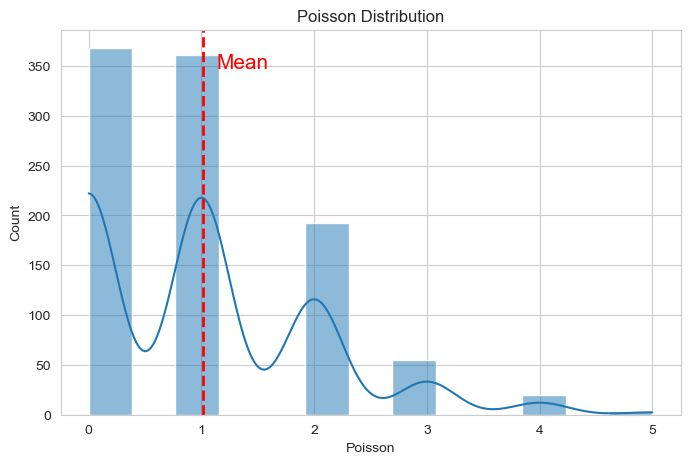

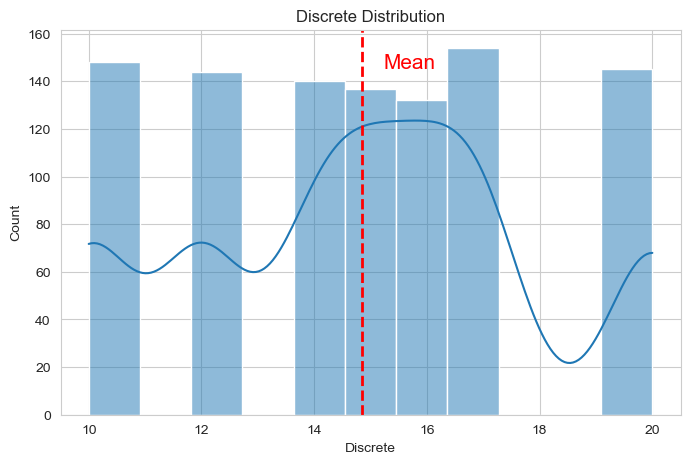

In [46]:
for col in df.columns:

  fig, axes = plt.subplots(figsize=(8,5))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)
  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')
# x=df[col].mean() + df[col].std()/8 - X-coordinate: a bit to the right of the mean
# y=axes.get_ylim()[1] * 0.90 - Y-coordinate: 90% up the Y-axis
# s='Mean' - Text to display
# fontsize=15 - Font size of the text
# c='r' - Text color (red)
    
  plt.show()
  print("\n")

### Median

The Median is the element that **divides the data into two equal parts**. 
  * It is calculated by arranging the data in ascending or descending order.
    * Then, if the number of elements is odd, it is given to the middle element in the arranged values. 
    * If the number of observations is even, the median is given by the mean of the two middle elements

To calculate the DataFrame median, just use the method `.median()` to see median levels for each numerical variable. The documentation link is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html)

In [50]:
df.median()

Normal             -0.0300
Positive Skewed     0.6860
Negative Skewed    -0.6375
Exponential        13.7660
Uniform             0.5225
Bimodal            30.1240
Multimodal         25.6245
Poisson             1.0000
Discrete           15.0000
dtype: float64

Let's plot the distribution, the median and the mean for normal distribution
  * You will notice mean and median levels are the same in a normal distribution. A normal distribution is one that is symmetrical around the mean.
  * We are running the same code from the previous section. The difference is that we are adding a line and text for the median level 

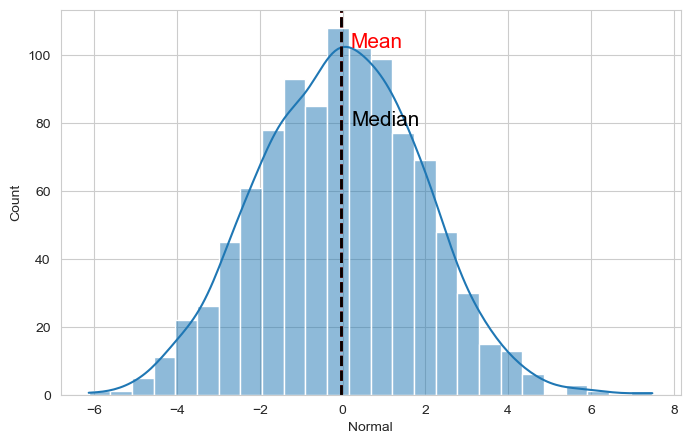

In [53]:
col = 'Normal'

fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)

plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

# x=df[col].mean() + df[col].std()/8 - X-coordinate: a bit to the right of the mean
# y=axes.get_ylim()[1] * 0.90 - Y-coordinate: 90% up the Y-axis
# s='Mean' - Text to display
# fontsize=15 - Font size of the text
# c='r' - Text color (red)

plt.show()

We will again plot all the columns from df, showing the mean and the median

Before plotting, can you guess what the mean and median level will be?
* Go back to the previous set of histograms and visualise where the median level would be. Once you finish this small task, run the cell below.

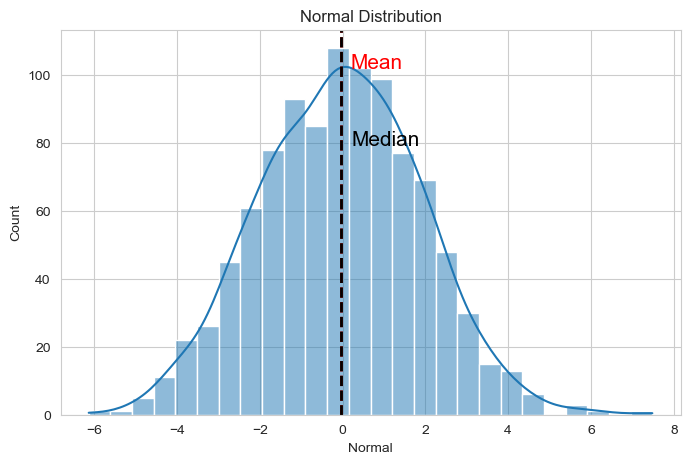

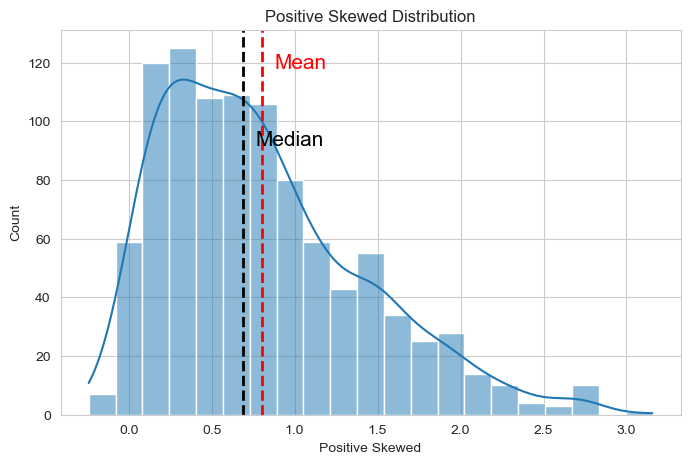

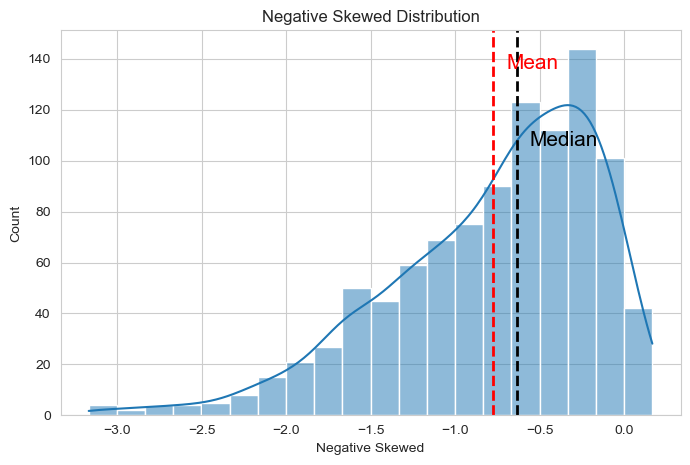

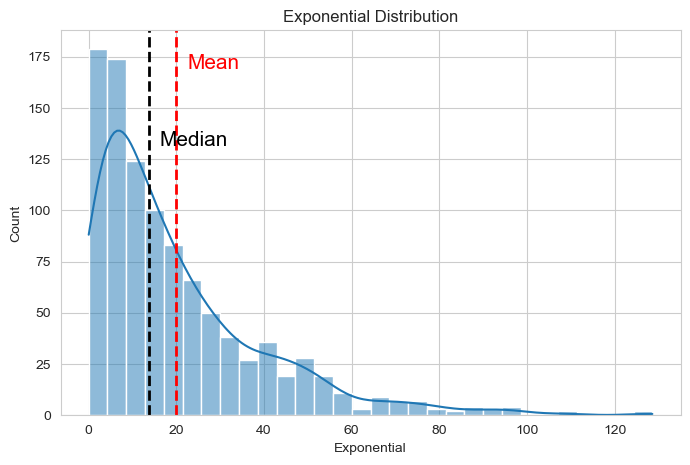

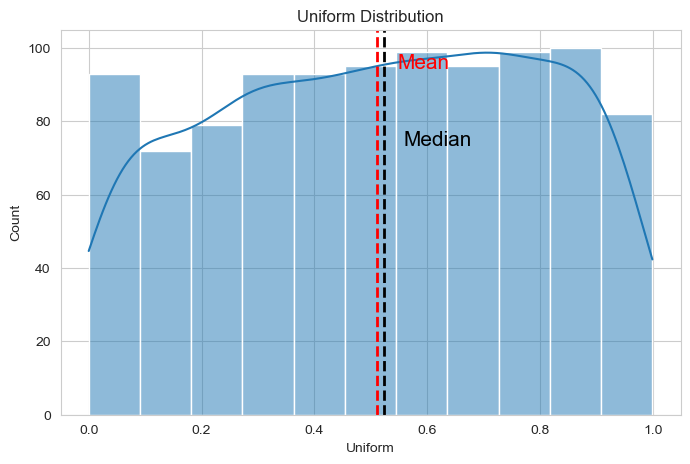

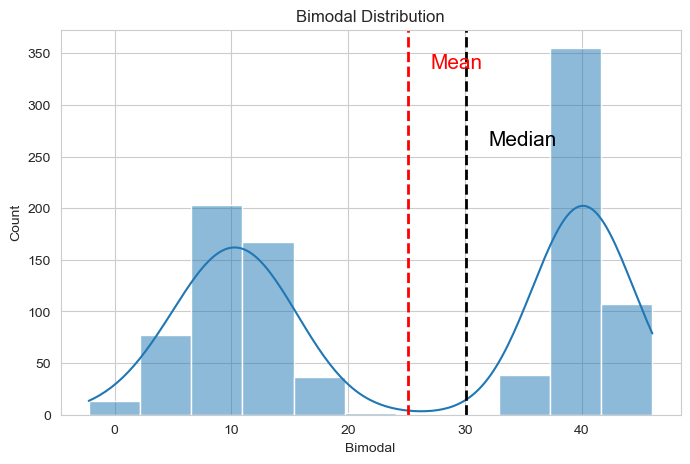

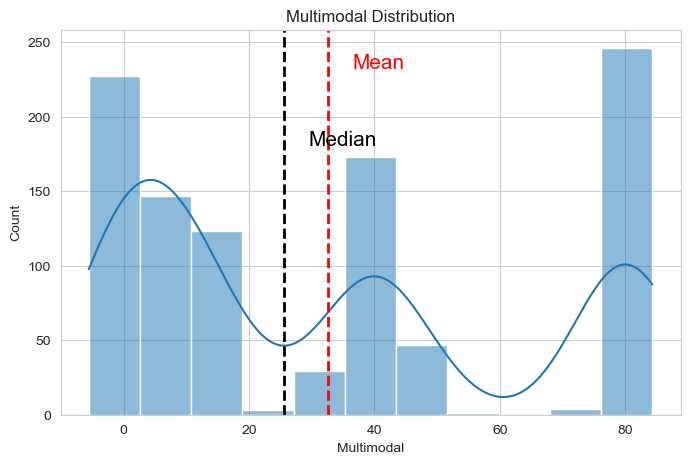

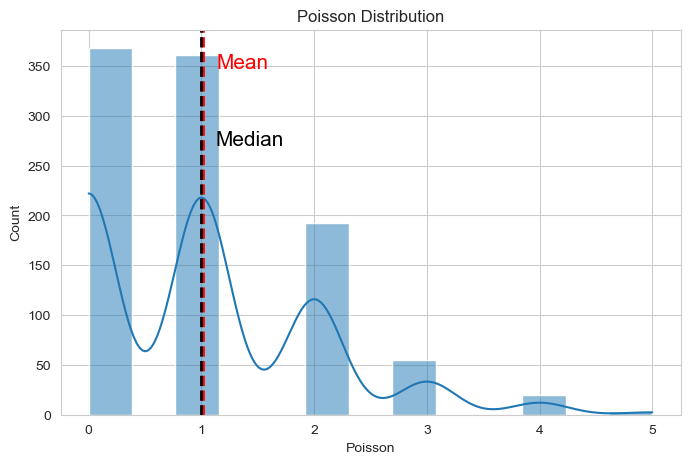

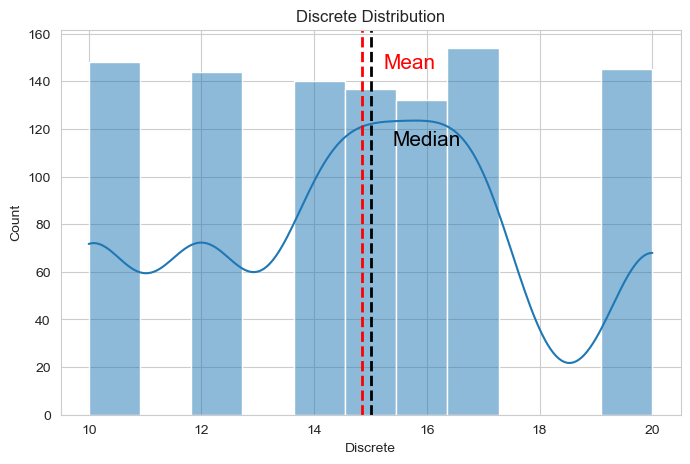

In [56]:
for col in df.columns:

  fig, axes = plt.subplots(figsize=(8,5))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)

  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

  plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

# x=df[col].mean() + df[col].std()/8 - X-coordinate: a bit to the right of the mean
# y=axes.get_ylim()[1] * 0.90 - Y-coordinate: 90% up the Y-axis
# s='Mean' - Text to display
# fontsize=15 - Font size of the text
# c='r' - Text color (red)

  plt.show()
  print("\n")

### Mode

Mode is the **most common element in the data**, the one that appears most often.
  * If there is only one number, it is called Uni-modal.
  * If there are two numbers, it is called Bi-modal.
  * If there are more than two modes, it is called Multi-modal.

To calculate the DataFrame mean, just use the method `.mode()` to see mode levels for each numerical variable. The documentation link is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html)
* You will notice that the variables may contain more than one mode. This is fine, as it just means that the given distribution has more than one number/element that is typically frequent. For **simplicity**, we will plot only the most frequent element in the upcoming exercise. We do that by gathering the first element with [0]

In [59]:
df.mode()

,Normal,Positive Skewed,Negative Skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,-0.471,0.255,-0.584,0.310,0.614,12.902,-2.206,0.0,17.0
1,0.015,0.344,-0.486,0.678,0.870,41.349,-2.179,NaN,NaN
2,0.149,0.345,-0.201,0.899,NaN,NaN,1.431,NaN,NaN
3,1.570,0.449,-0.194,3.097,NaN,NaN,3.297,NaN,NaN
4,NaN,0.646,NaN,4.246,NaN,NaN,42.276,NaN,NaN
5,NaN,0.902,NaN,5.512,NaN,NaN,44.701,NaN,NaN
6,NaN,1.652,NaN,5.532,NaN,NaN,79.797,NaN,NaN
7,NaN,NaN,NaN,5.662,NaN,NaN,81.860,NaN,NaN
8,NaN,NaN,NaN,6.797,NaN,NaN,81.867,NaN,NaN
9,NaN,NaN,NaN,7.350,NaN,NaN,NaN,NaN,NaN


Consider the Normal Distribution. You will notice that mean, median and mode have similar levels
* We are running the same code from the previous section. The difference is that we are adding a line and text for the mode level

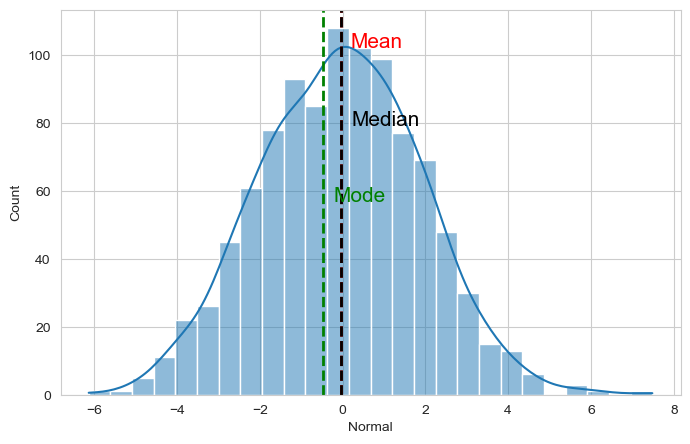

In [62]:
col = 'Normal'

fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)

plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

plt.axvline(df[col].mode()[0], color='g', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mode()[0] + df[col].std()/8 , y=axes.get_ylim()[1] * 0.50, s='Mode', fontsize=15, c='g')

# x=df[col].mean() + df[col].std()/8 - X-coordinate: a bit to the right of the mean
# y=axes.get_ylim()[1] * 0.90 - Y-coordinate: 90% up the Y-axis
# s='Mean' - Text to display
# fontsize=15 - Font size of the text
# c='r' - Text color (red)

plt.show()

We will scan over the variables and will plot their distribution.

Pay attention to the central figures (or central tendency elements) from your data: **mean, median, and mode level**. 
* Are they different? Much different?
* How are they positioned? For example: is the mean greater than the median?

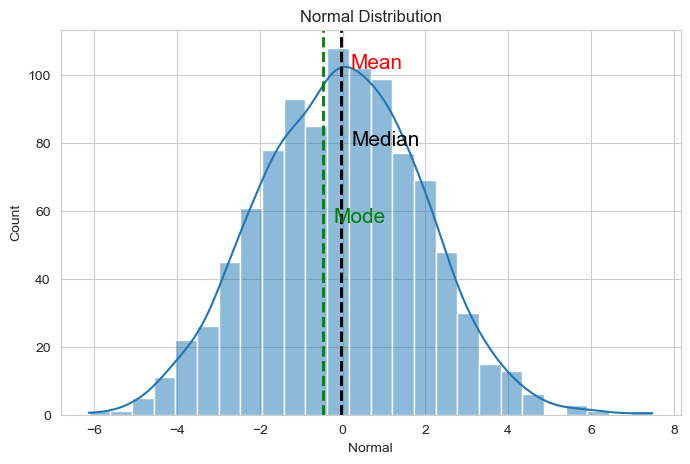

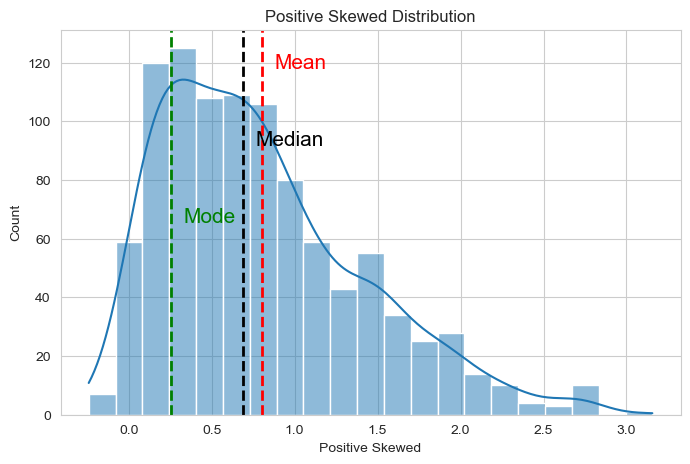

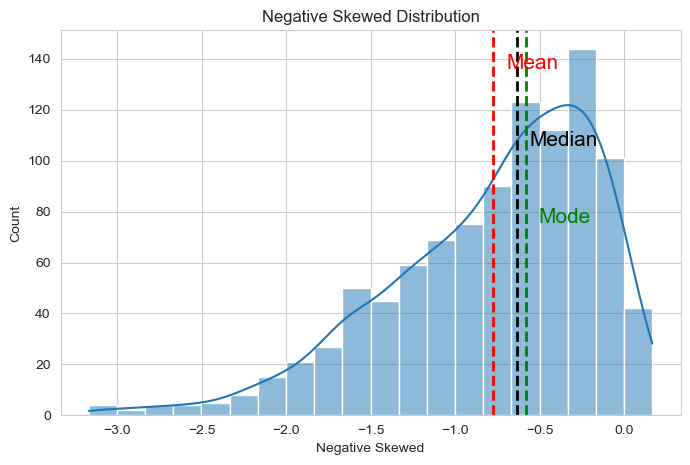

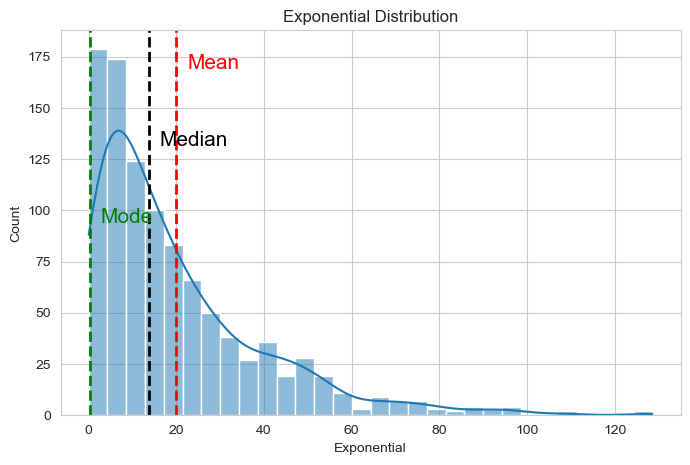

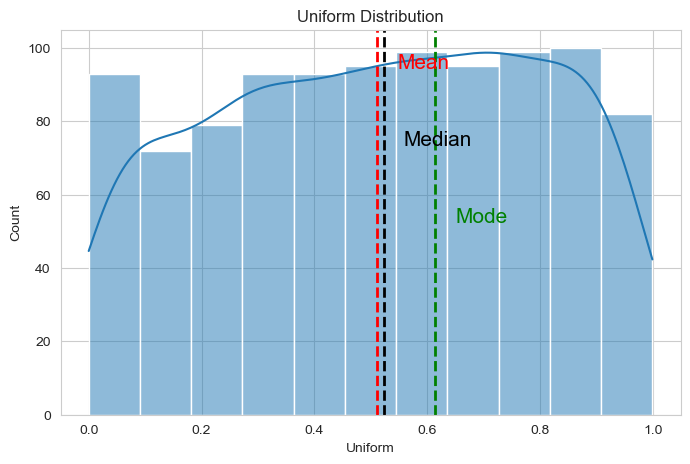

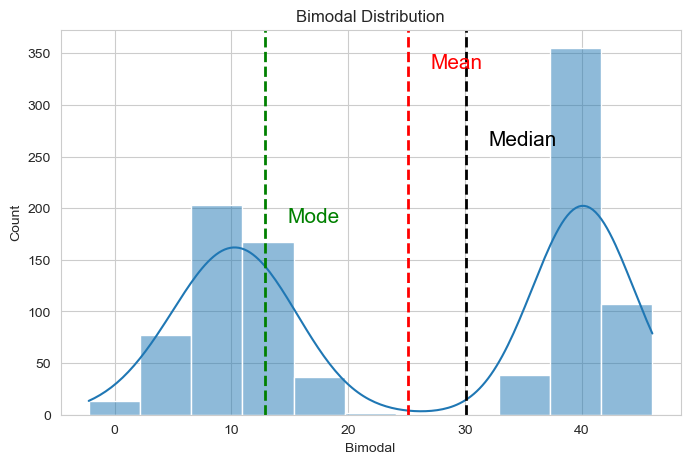

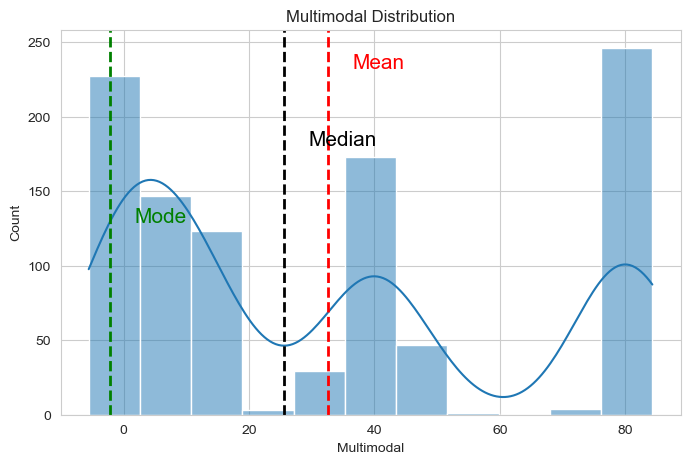

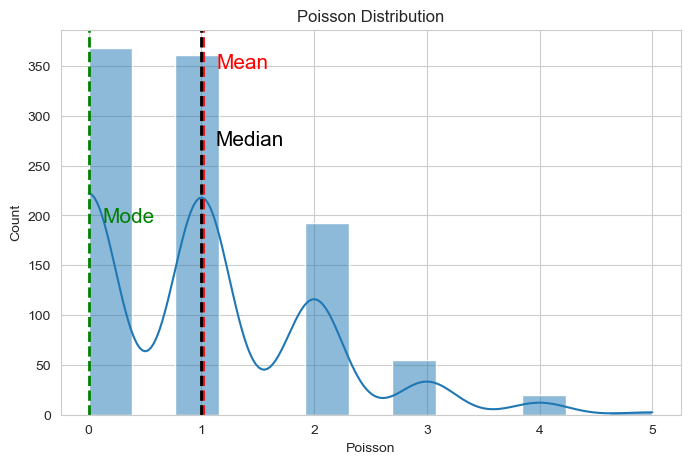

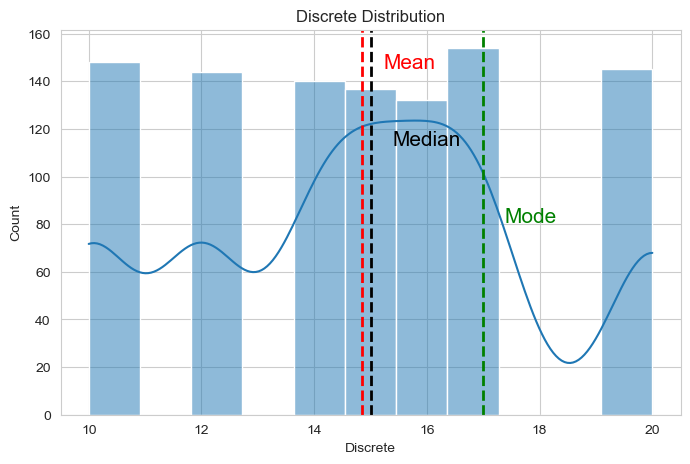

In [66]:
for col in df.columns:
    
  fig, axes = plt.subplots(figsize=(8,5))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)

  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

  plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

  plt.axvline(df[col].mode()[0], color='g', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mode()[0] + df[col].std()/8 , y=axes.get_ylim()[1] * 0.50, s='Mode', fontsize=15, c='g')


  plt.show()
  print("\n")

In [68]:
dataset = 'diamonds'  # 'penguins', 'iris' , 'tips', 'mpg', 'diamonds'
df = (sns.load_dataset(dataset)
      .sample(n=200,random_state=1)
      .select_dtypes(exclude=['object', 'category'] # for some reason seaborn datasets sometimes come with 
                                                    # variables' type marked as category
                                                    # instead of object.
                     )) 
print(df.shape)
df.head()

(200, 7)


,carat,depth,table,price,x,y,z
2714,0.33,61.7,55.0,564,4.43,4.46,2.74
14653,1.20,62.1,57.0,5914,6.78,6.71,4.19
52760,0.62,61.0,57.0,2562,5.51,5.54,3.37
48658,0.34,63.1,56.0,537,4.41,4.46,2.80
14812,1.20,62.5,55.0,5964,6.77,6.84,4.25


Examine the distribution shape for the variables. Ask yourself:
* What is the distribution shape?
* Do they look like the distributions (normal, exponential, multimodal etc.) we saw in this unit? Or does it look like a combination of shapes?
* What is the range (in the x-axis) that the data is most frequent?

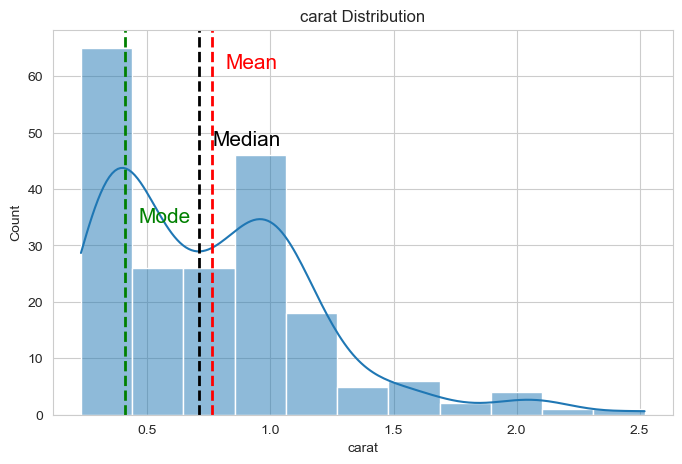

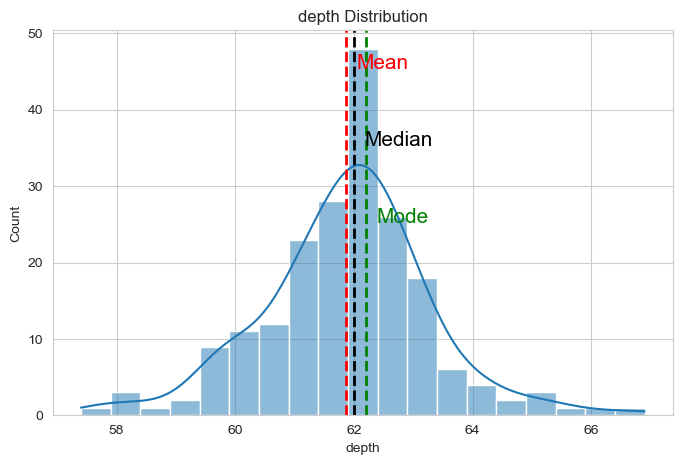

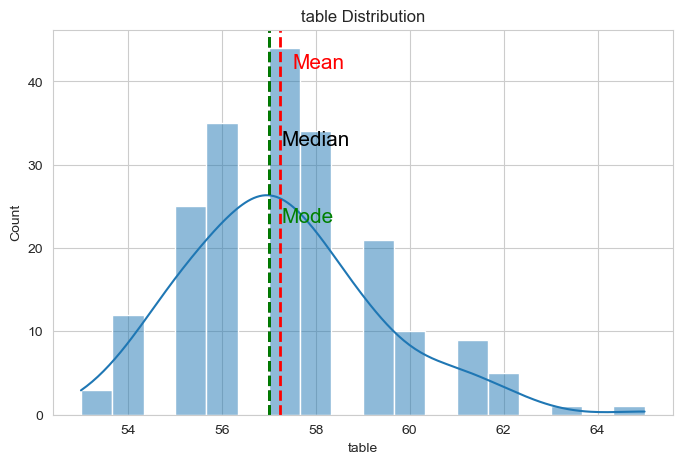

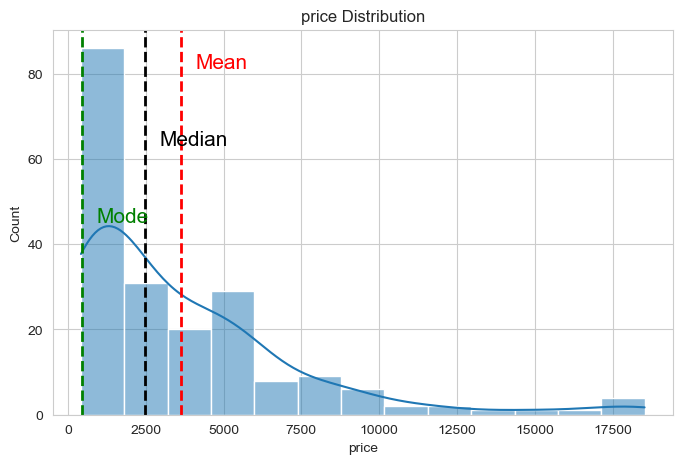

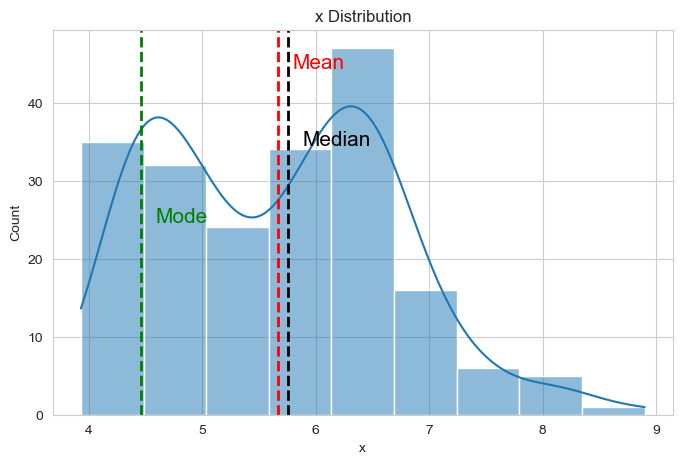

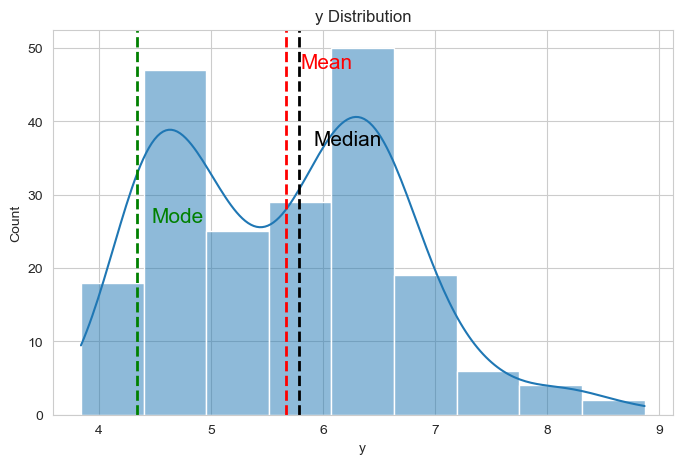

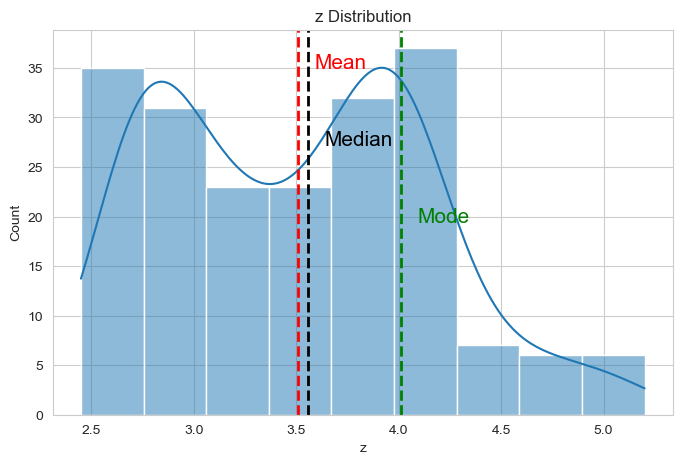

In [71]:
for col in df.columns:
    
  fig, axes = plt.subplots(figsize=(8,5))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)

  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

  plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

  plt.axvline(df[col].mode()[0], color='g', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mode()[0] + df[col].std()/8 , y=axes.get_ylim()[1] * 0.50, s='Mode', fontsize=15, c='g')

  plt.show()
  print("\n")